In [321]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse import random
from numba import jit
from sklearn.datasets import make_sparse_spd_matrix
from sklearn.metrics import mean_squared_error

#from jupyterthemes import jtplot
#jtplot.style()

In [283]:
class ising:
    
    def __init__(self, J,beta=2):
        self.J = J
        self.N = len(self.J)
        self.beta = beta        
        self.states = np.random.choice([-1,1],size = (self.N))
        
        self.C = np.zeros((self.N,self.N))
        self.counts = 0
        self.correl_counts = 0

   
    def energy(self):
        return -self.states@self.J@self.states
    
    def update(self):
        self.counts += 1
        i = np.random.randint(0,self.N)          
        self.E_old = self.energy()
        self.states[i] *= -1
        self.E_new = self.energy()        
        self.E_diff = self.E_new - self.E_old 
        #print(self.E_diff)
        if self.E_diff<0 or np.random.uniform()<np.exp(-1.4*self.E_diff*self.beta):
            pass     
        else:
            self.states[i] *= -1
            
        if self.counts%self.N ==0:
            self.correl_counts += 1
            self.C += np.outer(self.states,self.states)   
               
    def getCorrels(self):
        return self.C/self.correl_counts

In [299]:
N = 10
J_raw = np.zeros((N,N))
for i in range (N):   
    for j in range(i,N):
        if np.abs(i-j)<3:
            J_raw[i][j] = J_raw[j][i] = np.random.uniform(0.1,1.1)
            J_raw[i][i] = 0
P = np.around(np.random.uniform(1,10,size = N))
J_raw

array([[0.        , 0.1262476 , 0.68528239, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.1262476 , 0.        , 0.54522166, 0.55247636, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.68528239, 0.54522166, 0.        , 0.38997022, 0.9029949 ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.55247636, 0.38997022, 0.        , 0.87214592,
        0.62668969, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.9029949 , 0.87214592, 0.        ,
        0.695676  , 0.60369185, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.62668969, 0.695676  ,
        0.        , 0.79319259, 0.1010336 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.60369185,
        0.79319259, 0.        , 0.28043102, 0.26679243, 0.        ],
       [0.        , 0.        , 0.       

In [300]:
def pop_weight(M,pop):
    M_new = np.copy(M)
    for i in range(len(M)):
        for j in range (len(M)):
            pop_sum= 0
            for k in range(len(M)):
                if M_new[i][k]!=0:
                    pop_sum+=pop[k]
            if i!=j:
                M_new[i][j] = pop[j]*M_new[i][j]/pop_sum
    return M_new

J = pop_weight(J_raw,P)
np.around(J,2)


array([[0.  , 0.02, 0.6 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.35, 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.14, 0.05, 0.  , 0.08, 0.45, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.04, 0.19, 0.  , 0.31, 0.04, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.49, 0.13, 0.  , 0.05, 0.14, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.1 , 0.29, 0.  , 0.2 , 0.02, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25, 0.07, 0.  , 0.05, 0.09, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.07, 0.  , 0.2 , 0.14],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.13, 0.  , 0.49],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.73, 0.  ]])

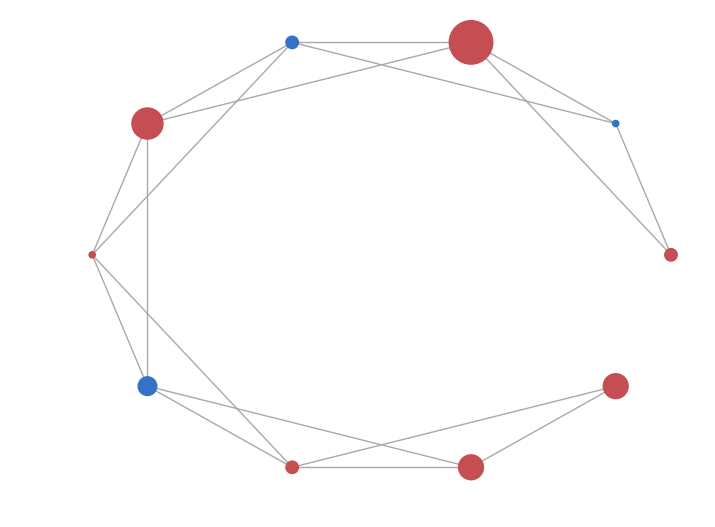

In [328]:
sys = ising(J)
graph = nx.Graph(J) 
positions=nx.shell_layout(graph) 
cols = np.where(sys.states>0,'r','b')
nx.draw(graph,positions,node_size=[v**2 * 20 for v in P],node_color=cols,edge_color ='#A9A9A9')
plt.savefig("ising_netw")
plt.show()

In [331]:
loops = 500
for i in range(loops):
    sys.update()

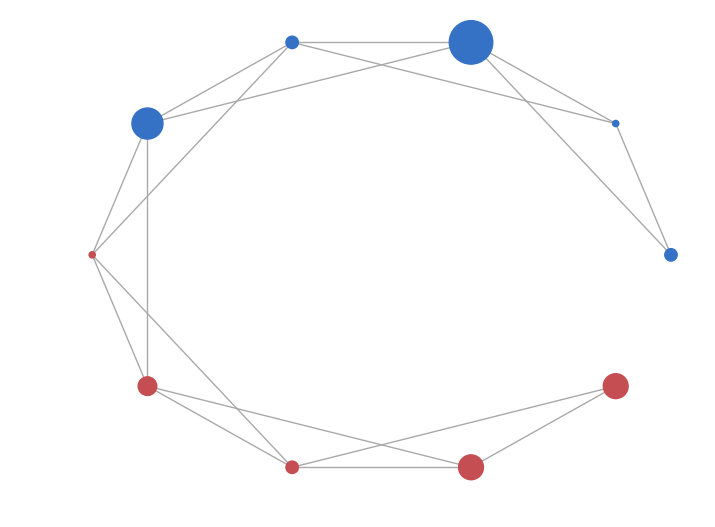

In [334]:
cols = np.where(sys.states>0,'r','b')
nx.draw(graph,positions,node_size=[v**2 * 20 for v in P],node_color=cols,edge_color ='#A9A9A9')
plt.savefig("ising_netw_after")
plt.show()